In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import cv2
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from sklearn.utils import class_weight

Analyse des données...

Train set: 28709 images réparties en 7 classes
Validation set: 7178 images réparties en 7 classes
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.

Class weights: {0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}

=== Phase 1: Entraînement des nouvelles couches ===


C:\Users\pc\anaconda3\newAnaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 914ms/step - accuracy: 0.2781 - loss: 1.8522 - precision: 0.4491 - recall: 0.0563
Epoch 1: val_accuracy improved from -inf to 0.37894, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 965s 1s/step - accuracy: 0.2781 - loss: 1.8521 - precision: 0.4492 - recall: 0.0563 - val_accuracy: 0.3789 - val_loss: 1.6256 - val_precision: 0.7404 - val_recall: 0.0858 - learning_rate: 0.0010
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.3424 - loss: 1.6718 - precision: 0.5869 - recall: 0.1034
Epoch 2: val_accuracy improved from 0.37894 to 0.42045, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 398s 443ms/step - accuracy: 0.3424 - loss: 1.6717 - precision: 0.5869 - recall: 0.1035 - val_accuracy: 0.4205 - val_loss: 1.5650 - val_precision: 0.7768 - val_recall: 0.1149 - learning_rate: 0.0010
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.3764 - loss: 1.5962 - precision: 0.6179 - recall: 0.1290
Epoch 3: val_accuracy did not improve from 0.42045
898/898 ━━━━━━━━━━━━━━━━━━━━ 348s 387ms/step - accuracy: 0.3764 - loss: 1.5963 - precision: 0.6179 - recall: 0.1290 - val_accuracy: 0.4120 - val_loss: 1.5631 - val_precision: 0.6772 - val_recall: 0.1347 - learning_rate: 0.0010
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.3741 - loss: 1.6170 - precision: 0.6051 - recall: 0.1328
Epoch 4: val_accuracy did not improve from 0.42045
898/898 ━━━━━━━━━━━━━━━━━━━━ 332s 369ms/step - accuracy: 0.3741 - loss: 1.6170 - precision: 0.6051 - recall: 0.1329 - val_accuracy: 0.3902 - val_loss: 1.5589 - val_precision: 0.6500 - val_recall

898/898 ━━━━━━━━━━━━━━━━━━━━ 305s 339ms/step - accuracy: 0.3941 - loss: 1.5275 - precision: 0.6258 - recall: 0.1538 - val_accuracy: 0.4230 - val_loss: 1.5310 - val_precision: 0.7204 - val_recall: 0.1213 - learning_rate: 0.0010
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.4036 - loss: 1.5175 - precision: 0.6385 - recall: 0.1623
Epoch 8: val_accuracy did not improve from 0.42296
898/898 ━━━━━━━━━━━━━━━━━━━━ 296s 330ms/step - accuracy: 0.4036 - loss: 1.5175 - precision: 0.6384 - recall: 0.1623 - val_accuracy: 0.4168 - val_loss: 1.5281 - val_precision: 0.7283 - val_recall: 0.1296 - learning_rate: 0.0010
Epoch 9/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.4051 - loss: 1.5087 - precision: 0.6228 - recall: 0.1607
Epoch 9: val_accuracy improved from 0.42296 to 0.43146, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 292s 325ms/step - accuracy: 0.4051 - loss: 1.5087 - precision: 0.6228 - recall: 0.1607 - val_accuracy: 0.4315 - val_loss: 1.5162 - val_precision: 0.7710 - val_recall: 0.1149 - learning_rate: 0.0010
Epoch 10/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.4032 - loss: 1.4983 - precision: 0.6288 - recall: 0.1710
Epoch 10: val_accuracy improved from 0.43146 to 0.43633, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 320s 322ms/step - accuracy: 0.4031 - loss: 1.4983 - precision: 0.6288 - recall: 0.1710 - val_accuracy: 0.4363 - val_loss: 1.4520 - val_precision: 0.7229 - val_recall: 0.1679 - learning_rate: 0.0010
Epoch 11/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.4134 - loss: 1.4868 - precision: 0.6347 - recall: 0.1697
Epoch 11: val_accuracy did not improve from 0.43633
898/898 ━━━━━━━━━━━━━━━━━━━━ 286s 318ms/step - accuracy: 0.4133 - loss: 1.4868 - precision: 0.6347 - recall: 0.1697 - val_accuracy: 0.4303 - val_loss: 1.4880 - val_precision: 0.7077 - val_recall: 0.1808 - learning_rate: 0.0010
Epoch 12/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.4064 - loss: 1.4981 - precision: 0.6376 - recall: 0.1770
Epoch 12: val_accuracy did not improve from 0.43633
898/898 ━━━━━━━━━━━━━━━━━━━━ 282s 314ms/step - accuracy: 0.4064 - loss: 1.4981 - precision: 0.6376 - recall: 0.1770 - val_accuracy: 0.4126 - val_loss: 1.5337 - val_precision: 0.7339 - val_re

898/898 ━━━━━━━━━━━━━━━━━━━━ 263s 293ms/step - accuracy: 0.4366 - loss: 1.4016 - precision: 0.6691 - recall: 0.1952 - val_accuracy: 0.4519 - val_loss: 1.4337 - val_precision: 0.7486 - val_recall: 0.1705 - learning_rate: 5.0000e-04
Epoch 17/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.4357 - loss: 1.4028 - precision: 0.6514 - recall: 0.1952
Epoch 17: val_accuracy did not improve from 0.45194
898/898 ━━━━━━━━━━━━━━━━━━━━ 260s 290ms/step - accuracy: 0.4357 - loss: 1.4028 - precision: 0.6514 - recall: 0.1952 - val_accuracy: 0.4512 - val_loss: 1.4373 - val_precision: 0.6937 - val_recall: 0.2023 - learning_rate: 5.0000e-04
Epoch 18/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.4446 - loss: 1.3779 - precision: 0.6677 - recall: 0.2091
Epoch 18: val_accuracy did not improve from 0.45194
898/898 ━━━━━━━━━━━━━━━━━━━━ 262s 292ms/step - accuracy: 0.4446 - loss: 1.3779 - precision: 0.6677 - recall: 0.2091 - val_accuracy: 0.4472 - val_loss: 1.4603 - val_precision: 0.7206 

898/898 ━━━━━━━━━━━━━━━━━━━━ 261s 290ms/step - accuracy: 0.4417 - loss: 1.3832 - precision: 0.6624 - recall: 0.2125 - val_accuracy: 0.4549 - val_loss: 1.4388 - val_precision: 0.7298 - val_recall: 0.1821 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

=== Phase 2: Fine-tuning ===
Epoch 21/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.3174 - loss: 3.7638 - precision: 0.3903 - recall: 0.1713
Epoch 21: val_accuracy did not improve from 0.45486
898/898 ━━━━━━━━━━━━━━━━━━━━ 316s 336ms/step - accuracy: 0.3175 - loss: 3.7624 - precision: 0.3903 - recall: 0.1713 - val_accuracy: 0.4181 - val_loss: 1.5142 - val_precision: 0.6767 - val_recall: 0.1571 - learning_rate: 1.0000e-04
Epoch 22/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.3822 - loss: 1.5585 - precision: 0.6434 - recall: 0.1518
Epoch 22: val_accuracy did not improve from 0.45486
898/898 ━━━━━━━━━━━━━━━━━━━━ 291s 324ms/step - accuracy: 0.3822 - loss: 1.5584 - precision: 

898/898 ━━━━━━━━━━━━━━━━━━━━ 293s 326ms/step - accuracy: 0.4602 - loss: 1.3701 - precision: 0.6987 - recall: 0.2344 - val_accuracy: 0.4805 - val_loss: 1.3864 - val_precision: 0.7579 - val_recall: 0.1863 - learning_rate: 1.0000e-04
Epoch 25/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.4735 - loss: 1.3326 - precision: 0.6979 - recall: 0.2485
Epoch 25: val_accuracy did not improve from 0.48050
898/898 ━━━━━━━━━━━━━━━━━━━━ 291s 324ms/step - accuracy: 0.4735 - loss: 1.3326 - precision: 0.6979 - recall: 0.2485 - val_accuracy: 0.4692 - val_loss: 1.3839 - val_precision: 0.7196 - val_recall: 0.2031 - learning_rate: 1.0000e-04
Epoch 26/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.4961 - loss: 1.2461 - precision: 0.7087 - recall: 0.2794
Epoch 26: val_accuracy improved from 0.48050 to 0.49805, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 294s 327ms/step - accuracy: 0.4961 - loss: 1.2461 - precision: 0.7087 - recall: 0.2794 - val_accuracy: 0.4980 - val_loss: 1.2989 - val_precision: 0.7619 - val_recall: 0.2630 - learning_rate: 1.0000e-04
Epoch 27/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.4965 - loss: 1.2586 - precision: 0.7040 - recall: 0.2810
Epoch 27: val_accuracy improved from 0.49805 to 0.51672, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 296s 330ms/step - accuracy: 0.4965 - loss: 1.2586 - precision: 0.7040 - recall: 0.2810 - val_accuracy: 0.5167 - val_loss: 1.2698 - val_precision: 0.7828 - val_recall: 0.2701 - learning_rate: 1.0000e-04
Epoch 28/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5139 - loss: 1.2056 - precision: 0.7215 - recall: 0.3076
Epoch 28: val_accuracy did not improve from 0.51672
898/898 ━━━━━━━━━━━━━━━━━━━━ 291s 324ms/step - accuracy: 0.5139 - loss: 1.2056 - precision: 0.7215 - recall: 0.3076 - val_accuracy: 0.5093 - val_loss: 1.2953 - val_precision: 0.7631 - val_recall: 0.2517 - learning_rate: 1.0000e-04
Epoch 29/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5230 - loss: 1.1861 - precision: 0.7191 - recall: 0.3125
Epoch 29: val_accuracy improved from 0.51672 to 0.52118, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 291s 324ms/step - accuracy: 0.5230 - loss: 1.1861 - precision: 0.7191 - recall: 0.3126 - val_accuracy: 0.5212 - val_loss: 1.2610 - val_precision: 0.7282 - val_recall: 0.2994 - learning_rate: 1.0000e-04
Epoch 30/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.5386 - loss: 1.1657 - precision: 0.7258 - recall: 0.3306
Epoch 30: val_accuracy improved from 0.52118 to 0.53775, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 292s 325ms/step - accuracy: 0.5386 - loss: 1.1657 - precision: 0.7258 - recall: 0.3306 - val_accuracy: 0.5378 - val_loss: 1.2427 - val_precision: 0.7637 - val_recall: 0.2953 - learning_rate: 1.0000e-04
Epoch 31/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.5376 - loss: 1.1463 - precision: 0.7251 - recall: 0.3340
Epoch 31: val_accuracy improved from 0.53775 to 0.53929, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 293s 326ms/step - accuracy: 0.5376 - loss: 1.1462 - precision: 0.7251 - recall: 0.3340 - val_accuracy: 0.5393 - val_loss: 1.2193 - val_precision: 0.7737 - val_recall: 0.2953 - learning_rate: 1.0000e-04
Epoch 32/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.5423 - loss: 1.1356 - precision: 0.7271 - recall: 0.3443
Epoch 32: val_accuracy improved from 0.53929 to 0.54110, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 293s 327ms/step - accuracy: 0.5423 - loss: 1.1356 - precision: 0.7271 - recall: 0.3443 - val_accuracy: 0.5411 - val_loss: 1.2165 - val_precision: 0.7754 - val_recall: 0.2991 - learning_rate: 1.0000e-04
Epoch 33/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.5528 - loss: 1.0864 - precision: 0.7341 - recall: 0.3654
Epoch 33: val_accuracy improved from 0.54110 to 0.54179, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 295s 329ms/step - accuracy: 0.5528 - loss: 1.0864 - precision: 0.7341 - recall: 0.3654 - val_accuracy: 0.5418 - val_loss: 1.2028 - val_precision: 0.7359 - val_recall: 0.3408 - learning_rate: 1.0000e-04
Epoch 34/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.5559 - loss: 1.1006 - precision: 0.7297 - recall: 0.3606
Epoch 34: val_accuracy did not improve from 0.54179
898/898 ━━━━━━━━━━━━━━━━━━━━ 293s 326ms/step - accuracy: 0.5559 - loss: 1.1006 - precision: 0.7297 - recall: 0.3606 - val_accuracy: 0.5176 - val_loss: 1.2649 - val_precision: 0.6983 - val_recall: 0.3302 - learning_rate: 1.0000e-04
Epoch 35/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.5687 - loss: 1.0753 - precision: 0.7344 - recall: 0.3860
Epoch 35: val_accuracy improved from 0.54179 to 0.56032, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 301s 335ms/step - accuracy: 0.5687 - loss: 1.0753 - precision: 0.7344 - recall: 0.3860 - val_accuracy: 0.5603 - val_loss: 1.1648 - val_precision: 0.7704 - val_recall: 0.3511 - learning_rate: 1.0000e-04
Epoch 36/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5735 - loss: 1.0578 - precision: 0.7434 - recall: 0.3898
Epoch 36: val_accuracy did not improve from 0.56032
898/898 ━━━━━━━━━━━━━━━━━━━━ 303s 338ms/step - accuracy: 0.5734 - loss: 1.0578 - precision: 0.7434 - recall: 0.3898 - val_accuracy: 0.5333 - val_loss: 1.2219 - val_precision: 0.7236 - val_recall: 0.3373 - learning_rate: 1.0000e-04
Epoch 37/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5751 - loss: 1.0314 - precision: 0.7377 - recall: 0.3953
Epoch 37: val_accuracy improved from 0.56032 to 0.57230, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 308s 343ms/step - accuracy: 0.5751 - loss: 1.0314 - precision: 0.7377 - recall: 0.3953 - val_accuracy: 0.5723 - val_loss: 1.1510 - val_precision: 0.7619 - val_recall: 0.3656 - learning_rate: 1.0000e-04
Epoch 38/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.5806 - loss: 1.0215 - precision: 0.7400 - recall: 0.4004
Epoch 38: val_accuracy did not improve from 0.57230
898/898 ━━━━━━━━━━━━━━━━━━━━ 297s 330ms/step - accuracy: 0.5806 - loss: 1.0215 - precision: 0.7400 - recall: 0.4004 - val_accuracy: 0.5651 - val_loss: 1.1707 - val_precision: 0.7497 - val_recall: 0.3568 - learning_rate: 1.0000e-04
Epoch 39/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.5916 - loss: 0.9939 - precision: 0.7466 - recall: 0.4142
Epoch 39: val_accuracy improved from 0.57230 to 0.57412, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 300s 334ms/step - accuracy: 0.5916 - loss: 0.9940 - precision: 0.7466 - recall: 0.4142 - val_accuracy: 0.5741 - val_loss: 1.1270 - val_precision: 0.7702 - val_recall: 0.3727 - learning_rate: 1.0000e-04
Epoch 40/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.5856 - loss: 1.0091 - precision: 0.7418 - recall: 0.4092
Epoch 40: val_accuracy did not improve from 0.57412
898/898 ━━━━━━━━━━━━━━━━━━━━ 295s 328ms/step - accuracy: 0.5856 - loss: 1.0091 - precision: 0.7418 - recall: 0.4092 - val_accuracy: 0.5711 - val_loss: 1.1379 - val_precision: 0.7608 - val_recall: 0.3899 - learning_rate: 1.0000e-04
Epoch 41/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5919 - loss: 1.0031 - precision: 0.7489 - recall: 0.4244
Epoch 41: val_accuracy improved from 0.57412 to 0.57829, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 7396s 8s/step - accuracy: 0.5919 - loss: 1.0031 - precision: 0.7489 - recall: 0.4244 - val_accuracy: 0.5783 - val_loss: 1.1217 - val_precision: 0.7534 - val_recall: 0.3959 - learning_rate: 1.0000e-04
Epoch 42/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5981 - loss: 0.9817 - precision: 0.7419 - recall: 0.4324
Epoch 42: val_accuracy did not improve from 0.57829
898/898 ━━━━━━━━━━━━━━━━━━━━ 306s 341ms/step - accuracy: 0.5981 - loss: 0.9817 - precision: 0.7419 - recall: 0.4324 - val_accuracy: 0.5719 - val_loss: 1.1417 - val_precision: 0.7266 - val_recall: 0.4099 - learning_rate: 1.0000e-04
Epoch 43/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5873 - loss: 0.9814 - precision: 0.7425 - recall: 0.4250
Epoch 43: val_accuracy did not improve from 0.57829
898/898 ━━━━━━━━━━━━━━━━━━━━ 303s 337ms/step - accuracy: 0.5873 - loss: 0.9814 - precision: 0.7425 - recall: 0.4250 - val_accuracy: 0.5713 - val_loss: 1.1239 - val_precision: 0.7447 - 

898/898 ━━━━━━━━━━━━━━━━━━━━ 305s 339ms/step - accuracy: 0.5989 - loss: 0.9739 - precision: 0.7498 - recall: 0.4299 - val_accuracy: 0.5834 - val_loss: 1.1088 - val_precision: 0.7446 - val_recall: 0.4004 - learning_rate: 1.0000e-04
Epoch 45/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.6091 - loss: 0.9423 - precision: 0.7577 - recall: 0.4476
Epoch 45: val_accuracy did not improve from 0.58345
898/898 ━━━━━━━━━━━━━━━━━━━━ 303s 337ms/step - accuracy: 0.6091 - loss: 0.9424 - precision: 0.7577 - recall: 0.4476 - val_accuracy: 0.5754 - val_loss: 1.1384 - val_precision: 0.7304 - val_recall: 0.4178 - learning_rate: 1.0000e-04
Epoch 46/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6118 - loss: 0.9496 - precision: 0.7510 - recall: 0.4488
Epoch 46: val_accuracy did not improve from 0.58345
898/898 ━━━━━━━━━━━━━━━━━━━━ 306s 340ms/step - accuracy: 0.6118 - loss: 0.9496 - precision: 0.7510 - recall: 0.4488 - val_accuracy: 0.5745 - val_loss: 1.1365 - val_precision: 0.7285 

898/898 ━━━━━━━━━━━━━━━━━━━━ 314s 349ms/step - accuracy: 0.6202 - loss: 0.9292 - precision: 0.7569 - recall: 0.4646 - val_accuracy: 0.5922 - val_loss: 1.0931 - val_precision: 0.7388 - val_recall: 0.4323 - learning_rate: 1.0000e-04
Epoch 49/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6225 - loss: 0.9188 - precision: 0.7577 - recall: 0.4652
Epoch 49: val_accuracy improved from 0.59223 to 0.59487, saving model to best_emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 310s 345ms/step - accuracy: 0.6225 - loss: 0.9188 - precision: 0.7577 - recall: 0.4652 - val_accuracy: 0.5949 - val_loss: 1.0947 - val_precision: 0.7415 - val_recall: 0.4327 - learning_rate: 1.0000e-04
Epoch 50/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6276 - loss: 0.9152 - precision: 0.7615 - recall: 0.4704
Epoch 50: val_accuracy did not improve from 0.59487
898/898 ━━━━━━━━━━━━━━━━━━━━ 311s 346ms/step - accuracy: 0.6276 - loss: 0.9152 - precision: 0.7615 - recall: 0.4704 - val_accuracy: 0.5928 - val_loss: 1.0974 - val_precision: 0.7431 - val_recall: 0.4301 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 49.

Évaluation du modèle final...
225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.5595 - loss: 1.1554 - precision: 0.6948 - recall: 0.4007

Performance finale sur le validation set:
Accuracy: 0.5949
Precision: 0.7415
Recall: 0.4327
225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step


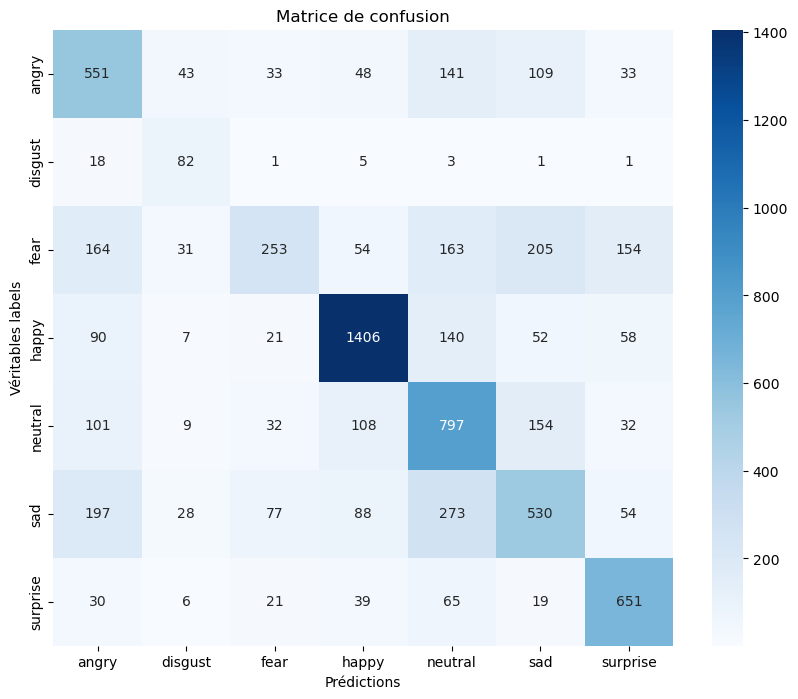


Rapport de classification détaillé:
              precision    recall  f1-score   support

       angry     0.4787    0.5752    0.5225       958
     disgust     0.3981    0.7387    0.5174       111
        fear     0.5776    0.2471    0.3461      1024
       happy     0.8043    0.7926    0.7984      1774
     neutral     0.5038    0.6464    0.5663      1233
         sad     0.4953    0.4250    0.4575      1247
    surprise     0.6623    0.7834    0.7178       831

    accuracy                         0.5949      7178
   macro avg     0.5600    0.6012    0.5608      7178
weighted avg     0.6005    0.5949    0.5843      7178


Modèle final sauvegardé sous 'emotion_model_final.h5'


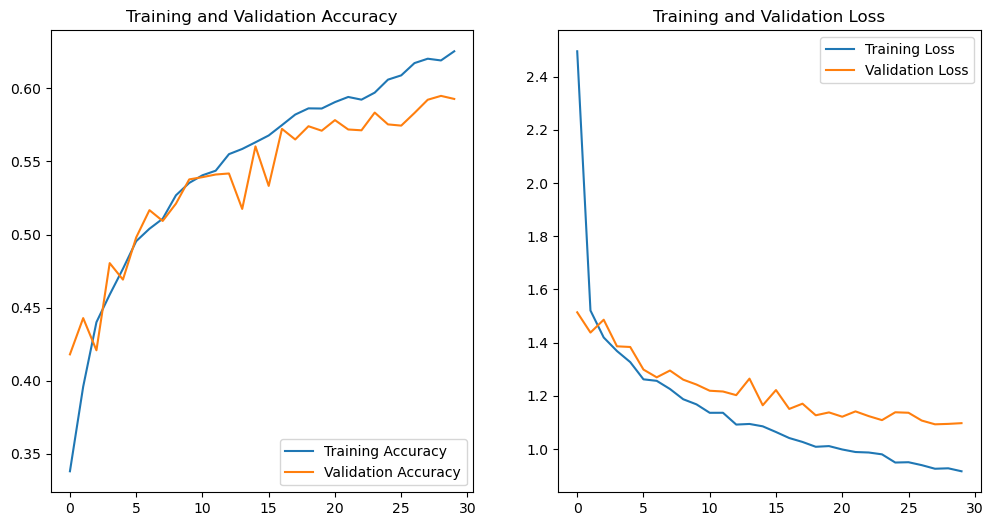

In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight

# Configuration
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'  # Activation mixed precision pour accélérer l'entraînement

# Paramètres
TARGET_SIZE = (128, 128)  # Augmentation de la résolution
BATCH_SIZE = 32
EPOCHS = 50
BASE_LEARNING_RATE = 0.001

# Chemins des données
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Vérification des données
print("Analyse des données...")
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
val_counts = {cls: len(os.listdir(os.path.join(validation_dir, cls))) for cls in os.listdir(validation_dir)}

print(f"\nTrain set: {sum(train_counts.values())} images réparties en {len(train_counts)} classes")
print(f"Validation set: {sum(val_counts.values())} images réparties en {len(val_counts)} classes")

# Data augmentation adaptée aux visages
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,        # Réduit pour préserver les caractéristiques faciales
    width_shift_range=0.1,     # Réduit
    height_shift_range=0.1,    # Réduit
    shear_range=0.1,           # Réduit
    zoom_range=0.1,            # Réduit
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],  # Variation plus faible
    fill_mode='nearest',
    validation_split=0.0
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des données
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=TARGET_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Calcul des class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

print("\nClass weights:", class_weights)

# Construction du modèle
def build_emotion_model(input_shape, num_classes):
    # Chargement de MobileNetV2 pré-entraîné
    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet',
        alpha=0.35  # Version plus légère
    )
    
    # Gel des couches de base initialement
    base_model.trainable = False
    
    # Nouvelle tête du modèle
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    
    return model, base_model

# Création du modèle
input_shape = (*TARGET_SIZE, 3)
num_classes = len(train_generator.class_indices)
model, base_model = build_emotion_model(input_shape, num_classes)

# Callbacks
callbacks = [
    ModelCheckpoint(
        'best_emotion_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    CSVLogger('training_log.csv')
]

# Compilation initiale (phase 1)
model.compile(
    optimizer=Adam(BASE_LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy', 
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# Entraînement en deux phases

# Phase 1: Entraînement des nouvelles couches seulement
print("\n=== Phase 1: Entraînement des nouvelles couches ===")
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)

# Phase 2: Fine-tuning des dernières couches de base
print("\n=== Phase 2: Fine-tuning ===")
base_model.trainable = True

# Ne dégeler que les dernières couches
for layer in base_model.layers[:100]:
    layer.trainable = False

# Recompilation avec un learning rate plus faible
model.compile(
    optimizer=Adam(BASE_LEARNING_RATE/10),
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# Reprise de l'entraînement
history_fine = model.fit(
    train_generator,
    epochs=EPOCHS,
    initial_epoch=history.epoch[-1]+1,
    validation_data=validation_generator,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)

# Évaluation finale
print("\nÉvaluation du modèle final...")
val_loss, val_acc, val_prec, val_rec = model.evaluate(validation_generator)
print(f"\nPerformance finale sur le validation set:")
print(f"Accuracy: {val_acc:.4f}")
print(f"Precision: {val_prec:.4f}")
print(f"Recall: {val_rec:.4f}")

# Prédictions et métriques détaillées
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = list(validation_generator.class_indices.keys())

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables labels')
plt.show()

# Rapport de classification
print("\nRapport de classification détaillé:")
print(classification_report(y_true, y_pred_classes, target_names=class_names, digits=4))

# Sauvegarde du modèle final
model.save('emotion_model_final.h5')
print("\nModèle final sauvegardé sous 'emotion_model_final.h5'")

# Visualisation des courbes d'apprentissage
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history_fine)


Métriques enregistrées : dict_keys(['accuracy', 'loss', 'precision_4', 'recall_4', 'val_accuracy', 'val_loss', 'val_precision_4', 'val_recall_4', 'learning_rate'])

 Résumé complet des métriques finales :
 Accuracy entraînement     : 0.35
 Accuracy validation       : 0.40
 Précision entraînement    : 0.58
 Précision validation      : 0.67
 Rappel entraînement       : 0.09
 Rappel validation         : 0.14


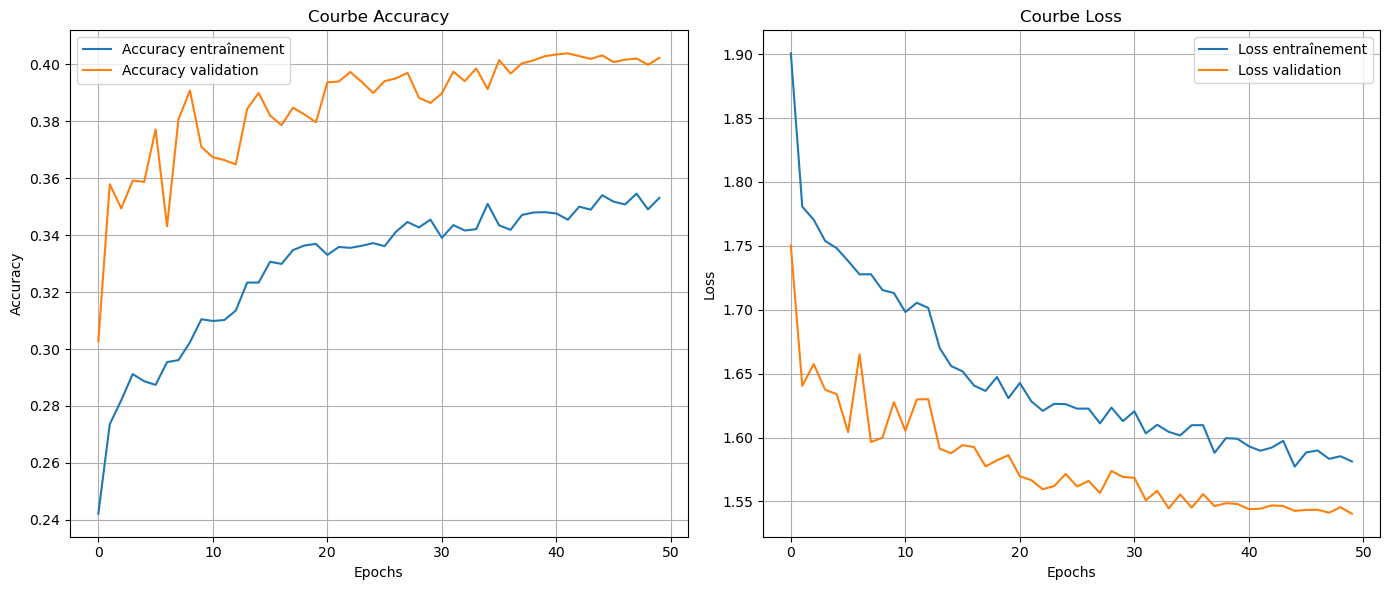

In [17]:

#  Vérification des clés présentes
print("\nMétriques enregistrées :", history.history.keys())

# Adaptation dynamique aux bonnes clés
precision_key = [k for k in history.history.keys() if 'precision' in k and not 'val' in k][0]
val_precision_key = [k for k in history.history.keys() if 'val_precision' in k][0]
recall_key = [k for k in history.history.keys() if 'recall' in k and not 'val' in k][0]
val_recall_key = [k for k in history.history.keys() if 'val_recall' in k][0]

#  Résumé complet des métriques finales
print("\n Résumé complet des métriques finales :")
print(f" Accuracy entraînement     : {history.history['accuracy'][-1]:.2f}")
print(f" Accuracy validation       : {history.history['val_accuracy'][-1]:.2f}")
print(f" Précision entraînement    : {history.history[precision_key][-1]:.2f}")
print(f" Précision validation      : {history.history[val_precision_key][-1]:.2f}")
print(f" Rappel entraînement       : {history.history[recall_key][-1]:.2f}")
print(f" Rappel validation         : {history.history[val_recall_key][-1]:.2f}")

#  Courbes d'Accuracy et de Loss
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title('Courbe Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.title('Courbe Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
